In [2]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [3]:
FIFA_files = files.upload();

train_df = pd.read_csv('/content/FIFA_train.csv')
test_df = pd.read_csv('/content/FIFA_test.csv')

Saving FIFA_test.csv to FIFA_test.csv
Saving FIFA_train.csv to FIFA_train.csv
Saving submission.csv to submission.csv


|| explanation | value
|--|--|--
id| 
name| 이름
age| 나이
continent| 국적의 대륙
contract_until| 계약기간 언제까지인지
position| 선수가 선호하는 포지션 | 'ST', 'GK', 'DF', 'MF'
prefer_foot| 선수가 선호하는 발 | 'left', 'right'
reputation| 선수가 유명한 정도 | 1.0, 2.0, 3.0, 4.0, 5.0
stat_overall| 현재 능력치 |47~94
stat_potential| 발전가능성 |48 ~ 94
stat_skill_moves| 개인기 능력치 | 1.0, 2.0, 3.0, 4.0, 5.0
value| 이적 시장가격


In [4]:
# id name age continent contract_until position prefer_foot reputation stat_overall stat_potential stat_skill_moves value
print("\n--------------------- train_df info ---------------------")
train_df.info()

print("\n--------------------- uniqueIndex ---------------------")
id = train_df['id'].unique();
name = train_df['name'].unique();
age = train_df['age'].unique();
continent = train_df['continent'].unique();
contract_until = train_df['contract_until'].unique();
position = train_df['position'].unique();
prefer_foot = train_df['prefer_foot'].unique();
reputation = train_df['reputation'].unique();
stat_overall = train_df['stat_overall'].unique();
stat_potential = train_df['stat_potential'].unique();
stat_skill_moves = train_df['stat_skill_moves'].unique();
value = train_df['value'].unique();

uniqueIndex = {
    "id" : id,
    "name" : name,
    "age" : age,
  "continent" : continent,
  "contract_until" :contract_until,
  "position" : position,
  "prefer_foot" : prefer_foot,
  "reputation" : reputation,
  "stat_overall" : stat_overall,
  "stat_potential" : stat_potential,
  "stat_skill_moves" : stat_skill_moves,
  "value" : value
}

uniqueIndex


--------------------- train_df info ---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB

--------------------- uniqueIndex ---------------------


{'id': array([    0,     3,     7, ..., 16941, 16942, 16948]),
 'name': array(['L. Messi', 'De Gea', 'L. Suárez', ..., 'N. Fuentes', 'J. Milli',
        'N. Christoffersson'], dtype=object),
 'age': array([31, 27, 32, 25, 26, 29, 33, 30, 40, 24, 28, 34, 23, 22, 35, 36, 21,
        18, 19, 37, 20, 39, 17, 38, 16]),
 'continent': array(['south america', 'europe', 'africa', 'asia', 'oceania'],
       dtype=object),
 'contract_until': array(['2021', '2020', '2019', '2023', '2022', '2024', 'Jun 30, 2019',
        '2026', 'Dec 31, 2018', '2018', '2025', 'Jun 30, 2020',
        'May 31, 2020', 'May 31, 2019', 'Jan 31, 2019', 'Jan 1, 2019',
        'Jan 12, 2019'], dtype=object),
 'position': array(['ST', 'GK', 'DF', 'MF'], dtype=object),
 'prefer_foot': array(['left', 'right'], dtype=object),
 'reputation': array([5., 4., 3., 1., 2.]),
 'stat_overall': array([94, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76,
        75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61,

In [5]:
'''
contract_until preprocessing

train_df["contract_until"] :['2021', '2020', '2019', '2023', '2022', '2024', 'Jun 30, 2019', '2026', 'Dec 31, 2018', '2018', '2025', 'Jun 30, 2020', 'May 31, 2020', 'May 31, 2019', 'Jan 31, 2019', 'Jan 1, 2019', 'Jan 12, 2019']
-> new_train_df["contract_until"] : ['2021', '2020', '2019', '2023', '2022', '2024', '2026', '2018', '2025']
'''

oldDate = []
newDate = []
for e in train_df["contract_until"] :
  if (len(str(e)) > 4) :
    oldDate.append(e)
    newDate.append(e[-4:])

new_train_df = train_df.replace(oldDate, newDate)
uniqueIndex["contract_until"] = new_train_df["contract_until"].unique()
uniqueIndex["contract_until"]

array(['2021', '2020', '2019', '2023', '2022', '2024', '2026', '2018',
       '2025'], dtype=object)

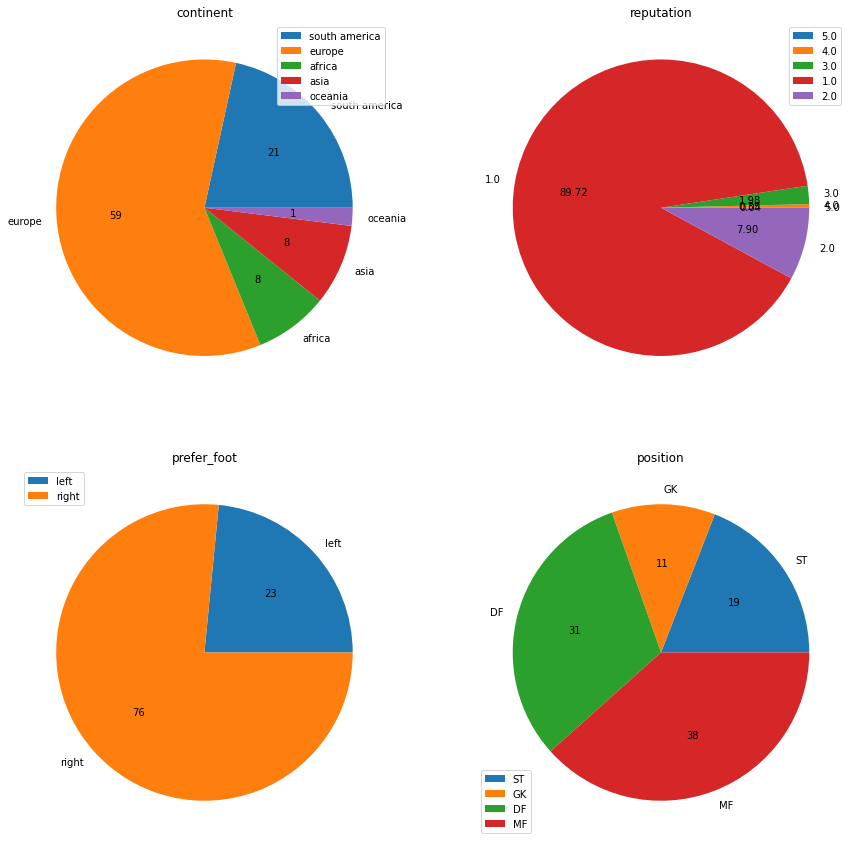

In [13]:
'''
multiple chart

continent      - 지역 : 유럽이 가장 많음
reputation     - 평판 점수 : 1점대가 가장 많음
prefer_foot    - 선호하는 발 : 오른발이 가장 많음
position       - 포지션

'''

fig, axes = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [12,12]

continent = pd.Series(train_df['continent'].value_counts(), index=uniqueIndex["continent"], name="continent")
axes[0][0].pie(continent,autopct="%d", labels = uniqueIndex["continent"]);

reputation = pd.Series(train_df['reputation'].value_counts(), index=uniqueIndex["reputation"], name="reputation")
axes[0][1].pie(reputation, autopct="%.2f", labels = uniqueIndex["reputation"]);

prefer_foot = pd.Series(train_df['prefer_foot'].value_counts(), index=uniqueIndex["prefer_foot"], name="prefer_foot")
axes[1][0].pie(prefer_foot, autopct="%d", labels = uniqueIndex["prefer_foot"]);

position = pd.Series(train_df['position'].value_counts(), index=uniqueIndex["position"], name="position")
axes[1][1].pie(position, autopct="%d", labels = uniqueIndex["position"]);

axes[0][0].set_title('continent')
axes[0][1].set_title('reputation')
axes[1][0].set_title('prefer_foot')
axes[1][1].set_title('position')
axes[0][0].legend()
axes[0][1].legend()
axes[1][0].legend()
axes[1][1].legend()
plt.show()



Text(0, 0.5, 'count')

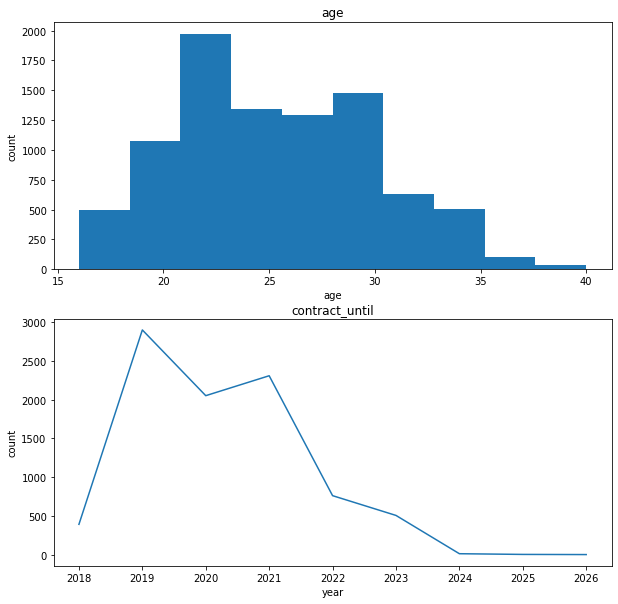

In [7]:
'''
age            - 나이
contract_until - 계약 종료
'''
fig, axes = plt.subplots(2,1)
plt.rcParams['figure.figsize'] = [10, 10]

axes[0].hist(train_df['age'])

contract_until = pd.Series(new_train_df['contract_until'].value_counts(), index=uniqueIndex["contract_until"], name="contract_until")
contract_until = contract_until.sort_index()
axes[1].plot(contract_until)

axes[0].set_title("age")
axes[1].set_title("contract_until")

axes[1].set_xlabel("year")
axes[0].set_ylabel("count")
axes[0].set_xlabel("age")
axes[1].set_ylabel("count")

Text(0.5, 1.0, '(2)')

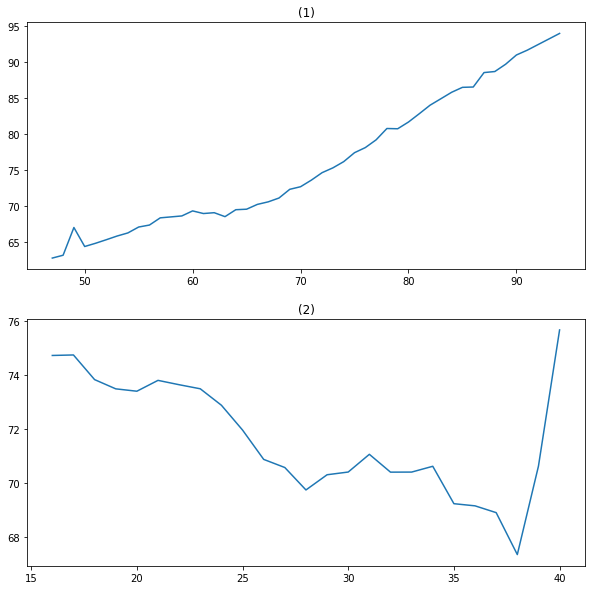

In [8]:
'''
특성들 간의 관계 여부 확인
(1) x : 현재 능력치, y : 미래 가능성 -> 비례 관계
(2) x : 나이       , y : 미래 가능성 -> 부분 반비례 관계
(3)
'''
num = 2
fig, axes = plt.subplots(num,1)
plt.rcParams['figure.figsize'] = [num*5, 10]

axes[0].plot(train_df.groupby("stat_overall").mean()["stat_potential"])
axes[1].plot(train_df.groupby("age").mean()["stat_potential"])

axes[0].set_title("(1)")
axes[1].set_title("(2)")

Text(0.5, 1.0, '(7)')

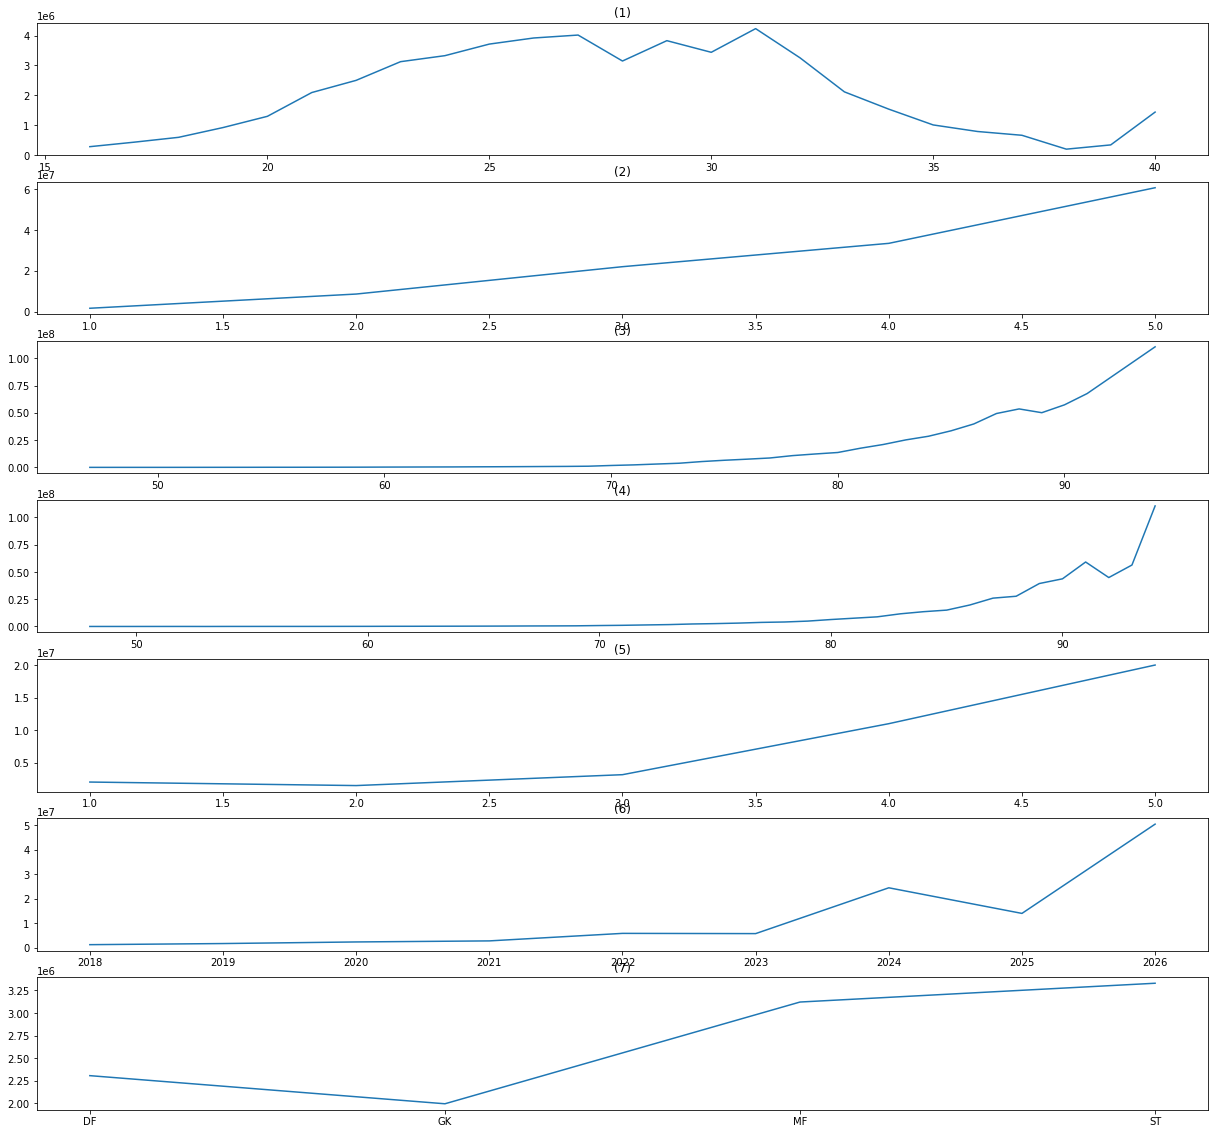

In [21]:
'''
시장가격과 특성 간의 관계 여부 확인
-> y : 이적 시장 가격

(1) x : 나이
(2) x : 유명정도 
(3) x : 현재 능력치 
(4) x : 미래 발전 가능성 
(5) x : 개인기 능력치 
(6) x : 계약기간
(7) x : 포지션
'''

num = 7
fig, axes = plt.subplots(num,1)
plt.rcParams['figure.figsize'] = [num*2, num*2-1]

axes[0].plot(train_df.groupby("age").mean()["value"])
axes[1].plot(train_df.groupby("reputation").mean()["value"])
axes[2].plot(train_df.groupby("stat_overall").mean()["value"])
axes[3].plot(train_df.groupby("stat_potential").mean()["value"])
axes[4].plot(train_df.groupby("stat_skill_moves").mean()["value"])
axes[5].plot(new_train_df.groupby("contract_until").mean()["value"])
axes[6].plot(train_df.groupby("position").mean()["value"])

axes[0].set_title("(1)")
axes[1].set_title("(2)")
axes[2].set_title("(3)")
axes[3].set_title("(4)")
axes[4].set_title("(5)")
axes[5].set_title("(6)")
axes[6].set_title("(7)")

# 데이터 분석 결과

## 데이터 분석 결론
1. 유럽 선수가 절반 이상으로 많다.
2. 왼발을 선호하는 선수가 76%정도이다.
3. 대부분의 선수 89%정도의 선수의 평판이 1점이다.
4. 포지션은 큰차이가 없지만 골키퍼 수가 작다.
5. 20대 선수가 반 이상이다.
6. 2019년까지의 계약이 가장 많다.
7. 현재 능력치가 높을 수록 미래 가능성이 높다
8. 부분적으로 나이가 많을수록 미래가능성이 낮다. 물론 40에 가까운 나이의 경우 미래 가능성이 높아지는 경향도 있다.

## 항목과 시장 가치 관계 결론
1. 나이가 25~30 사이의 나이일 때 높은 임금을 받는다
2. 포지션에서 MF,ST가 DF와 GK보다 더 높은 임금을 받는다
3. 남은 계약기간이 높을 수록 더 높은 임금을 받는다
4. 유명정도, 현재 능력치, 미래 발전가능성, 개인기 능력치가 높을수록 높은 임금을 받는다.

In [10]:
train_df.corr()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,1.000000,-0.475785,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280
age,-0.475785,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
reputation,-0.423739,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,-0.972374,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.630199,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,-0.402455,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
value,-0.544280,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000
